Total dataset size: 1000


E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


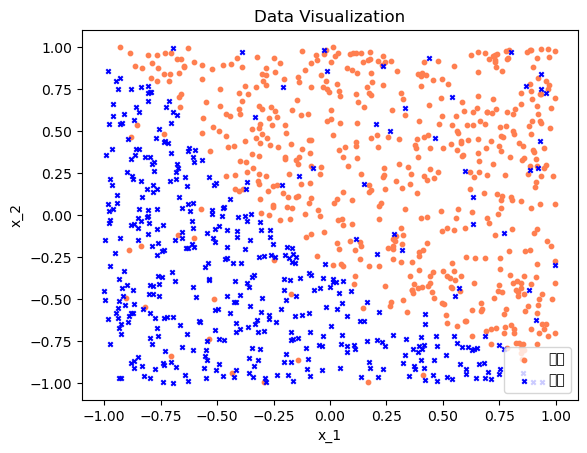

Training set size: 700
Testing set size: 300
Test Accuracy: 0.87
Test AUC: 0.9006761900497074


E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\avm\ado\envs\py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30028 (\N{CJK UNIFIED IDEOGRAPH-754C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


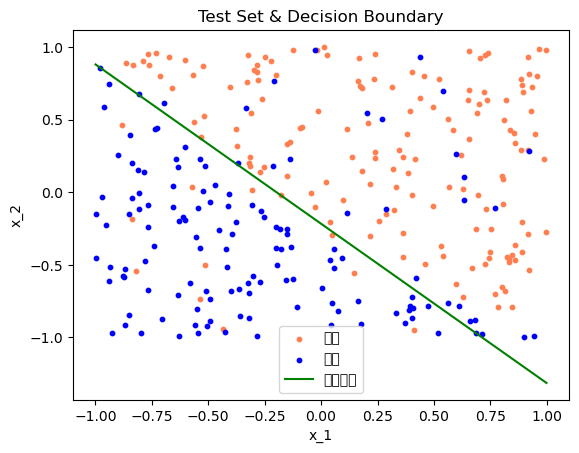

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 读入数据
lines = np.loadtxt('lr_dataset.csv', delimiter=',')
x_total = lines[:, 0:2]
y_total = lines[:, 2]
print("Total dataset size:", len(x_total))

# 数据可视化
pos_index = np.where(y_total == 1)
neg_index = np.where(y_total == 0)
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', color='coral', s=10, label='正类')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', color='blue', s=10, label='负类')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Data Visualization')
plt.legend()
plt.show()

# 划分训练集和测试集
np.random.seed(0)
ratio = 0.7
spilt_index = int(len(x_total) * ratio)
idx = np.random.permutation(len(x_total))
x_total = x_total[idx]
y_total = y_total[idx]
x_train, x_test = x_total[:spilt_index], x_total[spilt_index:]
y_train, y_test = y_total[:spilt_index], y_total[spilt_index:]
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

# 定义评价指标
def acc(y_true, y_pred):
    return np.mean(y_true == y_pred)

def auc(y_true, y_score):
    idx = np.argsort(y_score)[::-1]
    y_true = y_true[idx]
    y_score = y_score[idx]
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)
    tpr = tp / np.sum(y_true)
    fpr = fp / np.sum(1 - y_true)
    s = 0.0
    for i in range(1, len(tpr)):
        s += (fpr[i] - fpr[i-1]) * tpr[i]
    return s

# 定义sigmoid函数
def logistic(x):
    return 1 / (1 + np.exp(-x))

# 梯度下降训练逻辑回归
def GD(x, y, num_steps=1000, learning_rate=0.1, l2_coef=0.0):
    m, n = x.shape
    theta = np.zeros(n + 1)
    x_bias = np.hstack([np.ones((m, 1)), x])
    for step in range(num_steps):
        z = np.dot(x_bias, theta)
        h = logistic(z)
        grad = np.dot(x_bias.T, (h - y)) / m + l2_coef * np.r_[0, theta[1:]]
        theta -= learning_rate * grad
    return theta

# 训练模型
theta = GD(x_train, y_train, num_steps=1000, learning_rate=0.1, l2_coef=0.01)

# 预测
def predict(x, theta):
    x_bias = np.hstack([np.ones((x.shape[0], 1)), x])
    prob = logistic(np.dot(x_bias, theta))
    return (prob >= 0.5).astype(int), prob

y_pred, y_score = predict(x_test, theta)

# 评估
print("Test Accuracy:", acc(y_test, y_pred))
print("Test AUC:", auc(y_test, y_score))

# 可视化决策边界
plt.figure()
plt.scatter(x_test[y_test==1,0], x_test[y_test==1,1], color='coral', s=10, label='正类')
plt.scatter(x_test[y_test==0,0], x_test[y_test==0,1], color='blue', s=10, label='负类')
x1 = np.linspace(x_total[:,0].min(), x_total[:,0].max(), 100)
x2 = -(theta[0] + theta[1]*x1) / theta[2]
plt.plot(x1, x2, 'g-', label='决策边界')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Test Set & Decision Boundary')
plt.legend()
plt.show()